# Criando os nomes

In [674]:
import pandas as pd

In [675]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [676]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [677]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
30,ELIANE,0,342361,31,F
156,YASMIN,0,103787,157,F
173,GERALDA,0,91752,174,F
91,CELIA,0,184096,92,F
51,JOANA,0,268576,52,F


In [678]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
169,WELLINGTON,0,76820,170,M
103,MAICON,0,134295,104,M
57,IGOR,0,264732,58,M
37,EDSON,0,430171,38,M
124,CESAR,0,118354,125,M


In [679]:
print(f'Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [680]:
frames = [nomes_f, nomes_m]

In [681]:
nomes = pd.concat(frames)['nome'].to_frame()

In [682]:
nomes.sample(5)

,nome
117,WAGNER
51,ROGERIO
40,SERGIO
27,LUANA
86,CRISTINA


# Incluindo ID dos alunos

In [683]:
import numpy as np
np.random.seed(123)

In [684]:
total_alunos = len(nomes)

In [685]:
total_alunos

400

In [686]:
nomes.sample(10)

,nome
34,SEBASTIAO
42,MARLENE
103,MAICON
155,CECILIA
142,HUGO
109,CELSO
54,REGINA
87,JONAS
178,DENILSON
91,CELIA


In [687]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [688]:
nomes.sample(10)

,nome,id_aluno
46,FABIANA,373
159,SELMA,29
3,ANTONIA,383
97,BARBARA,71
64,ROBSON,188
59,ISABEL,261
36,ROBERTO,35
123,EVANDRO,16
134,VERONICA,2
181,IRACEMA,10


In [689]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']

In [690]:
nomes["dominio"] = np.random.choice(dominios, total_alunos)

In [691]:
nomes["email"] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [692]:
nomes.sample(5)

,nome,id_aluno,dominio,email
190,NATANAEL,72,@servicodoemail.com,natanael@servicodoemail.com
104,REINALDO,351,@servicodoemail.com,reinaldo@servicodoemail.com
193,LUCILENE,120,@servicodoemail.com,lucilene@servicodoemail.com
98,THAIS,12,@dominiodoemmail.com.br,thais@dominiodoemmail.com.br
2,ANTONIO,122,@dominiodoemmail.com.br,antonio@dominiodoemmail.com.br


In [693]:
nomes.pop("dominio")

0          @servicodoemail.com
1          @servicodoemail.com
2      @dominiodoemmail.com.br
3      @dominiodoemmail.com.br
4      @dominiodoemmail.com.br
                ...           
195        @servicodoemail.com
196    @dominiodoemmail.com.br
197    @dominiodoemmail.com.br
198        @servicodoemail.com
199    @dominiodoemmail.com.br
Name: dominio, Length: 400, dtype: object

In [694]:
nomes.head(10)

,nome,id_aluno,email
0,MARIA,189,maria@servicodoemail.com
1,ANA,58,ana@servicodoemail.com
2,FRANCISCA,204,francisca@dominiodoemmail.com.br
3,ANTONIA,383,antonia@dominiodoemmail.com.br
4,ADRIANA,231,adriana@dominiodoemmail.com.br
5,JULIANA,285,juliana@dominiodoemmail.com.br
6,MARCIA,105,marcia@dominiodoemmail.com.br
7,FERNANDA,237,fernanda@dominiodoemmail.com.br
8,PATRICIA,5,patricia@dominiodoemmail.com.br
9,ALINE,268,aline@servicodoemail.com


# Criando a tabela Cursos

In [695]:
!pip3 install html5lib
!pip3 install lxml

In [696]:
import html5lib

In [697]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [698]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [699]:
cursos[0]

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [700]:
type(cursos)

list

In [701]:
cursos = cursos[0]

In [702]:
type(cursos)

pandas.core.frame.DataFrame

In [703]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


## Alterando o index dos cursos

In [704]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [705]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [706]:
cursos['ID'] = cursos.index + 1

In [707]:
cursos.head(5)

,nome_do_curso,ID
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [708]:
cursos = cursos.set_index("ID")

In [709]:
cursos

,nome_do_curso
ID,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Manipulando alunos e alunas

In [710]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [711]:
nomes['matriculas'].describe()

count    400.000000
mean       2.125000
std        1.503338
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [712]:
import seaborn as sns

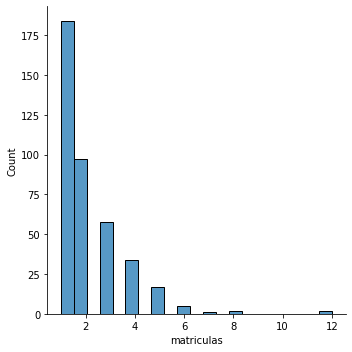

In [713]:
sns.displot(nomes.matriculas)

In [714]:
nomes.matriculas.value_counts()

1     184
2      97
3      58
4      34
5      17
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

In [715]:
nomes.sample(5)

,nome,id_aluno,email,matriculas
23,FERNANDO,134,fernando@servicodoemail.com,1
169,JOELMA,167,joelma@servicodoemail.com,2
148,APARECIDO,73,aparecido@servicodoemail.com,1
24,CLAUDIA,109,claudia@dominiodoemmail.com.br,3
105,MILENA,245,milena@servicodoemail.com,1


# Selecionando Cursos

In [716]:
nomes.sample(3)

,nome,id_aluno,email,matriculas
175,RIAN,127,rian@servicodoemail.com,1
96,TANIA,233,tania@dominiodoemmail.com.br,1
116,DOMINGOS,291,domingos@dominiodoemmail.com.br,1


In [717]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [718]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        matricula = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(matricula)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno','id_curso'])

In [719]:
matriculas.head()

,id_aluno,id_curso
0,189,12
1,189,14
2,189,3
3,58,7
4,58,3


In [720]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,36,Java para Web
3,43,C# para Web
4,18,Ruby on Rails
5,55,Cursos de Python
6,64,PHP com MySql
7,41,.NET para web
8,53,Novas integrações com Java
9,11,TDD com Java


In [721]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

In [722]:
nomes.head()

,nome,id_aluno,email,matriculas
0,MARIA,189,maria@servicodoemail.com,3
1,ANA,58,ana@servicodoemail.com,2
2,FRANCISCA,204,francisca@dominiodoemmail.com.br,1
3,ANTONIA,383,antonia@dominiodoemmail.com.br,1
4,ADRIANA,231,adriana@dominiodoemmail.com.br,1


In [723]:
cursos.head()

,nome_do_curso
ID,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [724]:
matriculas.head()

,id_aluno,id_curso
0,189,12
1,189,14
2,189,3
3,58,7
4,58,3


In [725]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,36,Java para Web
3,43,C# para Web
4,18,Ruby on Rails
5,55,Cursos de Python


# Saida em diferentes formatos

In [726]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,36,Java para Web
3,43,C# para Web


In [727]:
matriculas_por_curso.to_csv('files/matriculas_por_curso.csv', index=False)

In [728]:
matriculas_csv = pd.read_csv('files/matriculas_por_curso.csv')
matriculas_csv

,quantidade_de_alunos,nome_do_curso
0,18,Lógica de programação
1,36,Java para Web
2,43,C# para Web
3,18,Ruby on Rails
4,55,Cursos de Python
5,64,PHP com MySql
6,41,.NET para web
7,53,Novas integrações com Java
8,11,TDD com Java
9,1,Código limpo com C#


In [729]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":18,"2":36,"3":43,"4":18,"5":55,"6":64,"7":41,"8":53,"9":11,"10":1,"11":22,"12":74,"13":7,"14":67,"15":85,"16":46,"17":75,"18":18,"19":60,"20":56},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [730]:
matriculas_html = matriculas_por_curso.to_html()
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>18</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>36</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>43</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>18</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>55</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>64</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>41</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>53</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>11</td>


# Criando o banco SQL

In [731]:
!pip install sqlalchemy

In [732]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [733]:
engine = create_engine('sqlite:///:memory:')

In [734]:
engine

Engine(sqlite:///:memory:)

In [735]:
type(engine)

sqlalchemy.engine.base.Engine

In [736]:
matriculas_por_curso.to_sql('matriculas', engine)

In [737]:
inspector = inspect(engine) 

In [738]:
print(inspector.get_table_names())

['matriculas']


# Buscando SQL

In [739]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [740]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,18,Lógica de programação
1,4,18,Ruby on Rails
2,9,11,TDD com Java
3,10,1,Código limpo com C#
4,13,7,Persistência com .NET
5,18,18,Programação funcional


In [741]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso','quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,18
1,Java para Web,36
2,C# para Web,43
3,Ruby on Rails,18
4,Cursos de Python,55
5,PHP com MySql,64
6,.NET para web,41
7,Novas integrações com Java,53
8,TDD com Java,11
9,Código limpo com C#,1


In [742]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso','quantidade_de_alunos'])

In [743]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,18
1,Java para Web,36
2,C# para Web,43
3,Ruby on Rails,18
4,Cursos de Python,55
5,PHP com MySql,64
6,.NET para web,41
7,Novas integrações com Java,53
8,TDD com Java,11
9,Código limpo com C#,1


In [744]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [745]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
11,Hardware básico,74
14,Análise de dados,85
16,Internet das coisas,75


# Escrevendo no banco

In [746]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [747]:
inspector = inspect(engine) 

In [748]:
print(inspector.get_table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [749]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,36,Java para Web
3,43,C# para Web
4,18,Ruby on Rails
5,55,Cursos de Python
6,64,PHP com MySql
7,41,.NET para web
8,53,Novas integrações com Java
9,11,TDD com Java


In [750]:
matriculas

,id_aluno,id_curso
0,189,12
1,189,14
2,189,3
3,58,7
4,58,3
...,...,...
845,50,7
846,244,12
847,244,12
848,244,2


In [751]:
id_curso_escolhido = 16

In [752]:
proxima_turma = matriculas.query(f"id_curso == {id_curso_escolhido}")

In [753]:
proxima_turma.head()

,id_aluno,id_curso
17,237,16
21,5,16
34,322,16
37,90,16
56,173,16


In [754]:
nomes.sample(3)

,nome,id_aluno,email,matriculas
9,ALINE,268,aline@servicodoemail.com,2
14,MARCELO,271,marcelo@servicodoemail.com,2
141,ORLANDO,61,orlando@dominiodoemmail.com.br,2


In [755]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,email,matriculas
id_aluno,,,,
5,16,PATRICIA,patricia@dominiodoemmail.com.br,5
7,16,ALBERTO,alberto@servicodoemail.com,2
18,16,ELIZABETE,elizabete@servicodoemail.com,2
28,16,ROGERIO,rogerio@servicodoemail.com,2
36,16,LAURA,laura@dominiodoemmail.com.br,3
40,16,FRANCIELE,franciele@dominiodoemmail.com.br,1
53,16,DEBORA,debora@servicodoemail.com,4
60,16,DANIEL,daniel@servicodoemail.com,2
62,16,EDER,eder@dominiodoemmail.com.br,4


In [756]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
5        PATRICIA
7         ALBERTO
18      ELIZABETE
28        ROGERIO
36          LAURA
40      FRANCIELE
53         DEBORA
60         DANIEL
62           EDER
86        JENIFER
87           NAIR
89         CICERA
90        LETICIA
91        ANDREIA
112        GERSON
113         ZILDA
130        CLEIDE
135       TATIANA
158      LEONARDO
173          RITA
179       JOSIANE
186         LUANA
188        ROBSON
194       ISABELA
207        TEREZA
209       JAILSON
224       IVONETE
226        WILIAN
234         ODAIR
237      FERNANDA
246       OSVALDO
246       OSVALDO
273        CINTIA
273        CINTIA
279    ALESSANDRO
281        REBECA
297     JAQUELINE
301        ELIANA
315        RENATA
322       JESSICA
331         JAIME
336       LEANDRO
346       VALERIA
351      REINALDO
353        NILSON
397      EDIVALDO
Name: nome, dtype: object

In [757]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
5,PATRICIA
7,ALBERTO
18,ELIZABETE
28,ROGERIO
36,LAURA
40,FRANCIELE
53,DEBORA
60,DANIEL
62,EDER


In [758]:
nome_curso = cursos.loc[id_curso_escolhido]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [759]:
nome_curso = nome_curso.nome_do_curso

In [760]:
nome_curso

'Estatística básica'

In [761]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [766]:
proxima_turma = proxima_turma.rename(columns={'nome': f'Alunos do curso de {nome_curso}'})

In [767]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
18,ELIZABETE
90,LETICIA
331,JAIME
273,CINTIA
351,REINALDO


# Excel

In [768]:
proxima_turma.to_excel('files/proxima_turma.xlsx', index=False)

In [771]:
pd.read_excel('files/proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,PATRICIA
1,ALBERTO
2,ELIZABETE
3,ROGERIO
4,LAURA
5,FRANCIELE
6,DEBORA
7,DANIEL
8,EDER
9,JENIFER
